In [1]:
# std
import os
from os import path
import time

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, statistics as stats
from src.configuration import cfg
os.chdir('analysis-adelie')

# ttest
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':20}
matplotlib.rc('font', **font)

%matplotlib qt

In [2]:
# defining frequency bands
cfg['bands'] = {'gamma': [40, 100], 'beta': [12, 40], 'alpha': [8, 12], 'theta': [4, 8], 'delta': [1, 4]}

# defining ratios
ratioList = ['gamma / beta', 'gamma / alpha', 'gamma / theta', 'gamma / delta', 'beta / alpha', 'beta / theta', 'beta / delta', 'alpha / theta', 'alpha / delta', 'theta / delta']

In [14]:
# Adélie's data
baseline_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='adelie')
meditation_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='adelie')

merged_bandpower_adelie = pd.concat([baseline_bandpowers_adelie, meditation_bandpowers_adelie], keys=["baseline", "meditation"])

In [15]:
# Sam's data
baseline_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam')
meditation_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam')

merged_bandpower_sam = pd.concat([baseline_bandpowers_sam, meditation_bandpowers_sam], keys=["baseline", "meditation"])

In [6]:
# Sam's data
baseline_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam2')
meditation_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam2')

merged_bandpower_sam2 = pd.concat([baseline_bandpowers_sam2, meditation_bandpowers_sam2], keys=["baseline", "meditation"])

In [4]:
# Raphaël's data
baseline_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael')
meditation_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael')

merged_bandpower_rap = pd.concat([baseline_bandpowers_rap, meditation_bandpowers_rap], keys=["baseline", "meditation"])

### Mean spectral band powers with bar errors, baseline vs. meditation

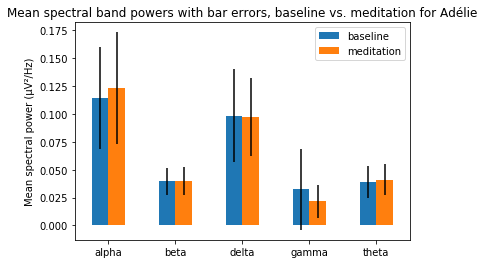

In [5]:
# bandpowers Adélie
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_adelie, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Adélie")

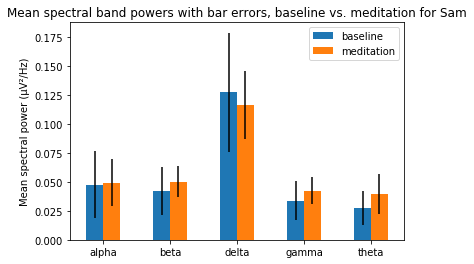

In [7]:
# bandpowers Sam
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam")

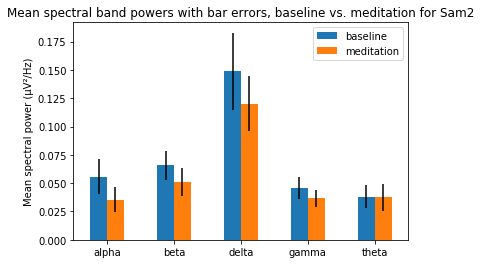

In [7]:
# bandpowers Sam2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam2, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam2")

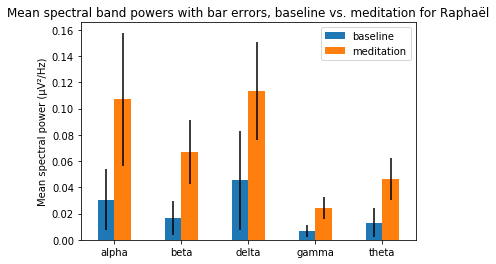

In [5]:
# bandpowers Raphaël
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Raphaël")

### Mean spectral band power ratios with bar errors, baseline vs. meditation

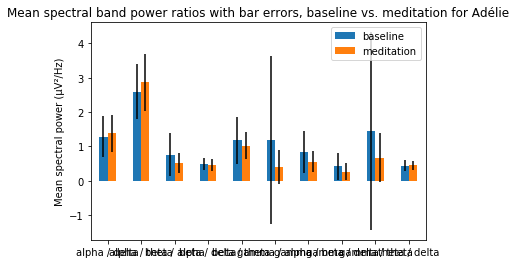

In [5]:
# bandpower ratios Adélie
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_adelie, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Adélie")

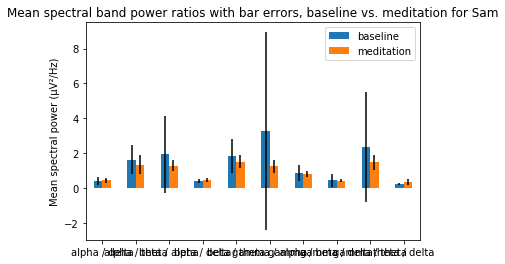

In [6]:
# bandpower ratios Sam
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam")

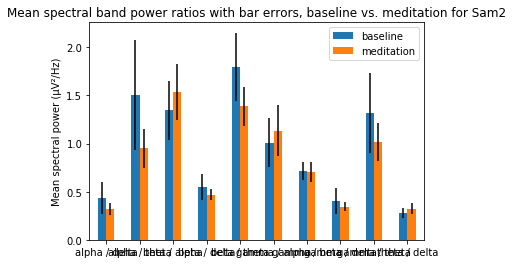

In [8]:
# bandpower ratios Sam2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam2, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam2")

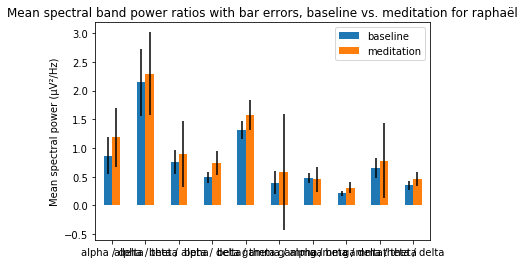

In [9]:
# bandpower ratios Raphaël
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Raphaël")

### Specific band's mean spectral bandpower overtime (epochs)

In [16]:
# merge Adélie
pre_merge_meditation = meditation_bandpowers_adelie.copy()
pre_merge_baseline = baseline_bandpowers_adelie.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_adelie_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [73]:
# theta band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('theta', level=0),
                         title='Mean spectral power of theta band overtime for Adélie')

In [304]:
# alpha band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('alpha', level=0),
                         title='Mean spectral power of alpha band overtime for Adélie')

In [305]:
# gamma band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('gamma', level=0),
                         title='Mean spectral power of gamma band overtime for Adélie')

In [307]:
# delta band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('delta', level=0),
                         title='Mean spectral power of delta band overtime for Adélie')

In [28]:
# merge Sam
pre_merge_meditation = meditation_bandpowers_sam.copy()
pre_merge_baseline = baseline_bandpowers_sam.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [290]:
# theta band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('theta', level=0),
                         title='Mean spectral power of theta band overtime for Sam')

In [ ]:
# alpha band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('alpha', level=0))

In [ ]:
# gamma band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('gamma', level=0))

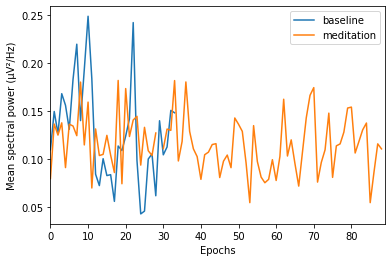

In [68]:
# delta band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('delta', level=0))

In [10]:
# merge Raphaël
pre_merge_meditation = meditation_bandpowers_rap.copy()
pre_merge_baseline = baseline_bandpowers_rap.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_rap_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [23]:
# merge Sam2
pre_merge_meditation = meditation_bandpowers_sam2.copy()
pre_merge_baseline = baseline_bandpowers_sam2.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam2_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

### Statistical analysis on naive metrics: FWER corrected t-test

In [29]:
# Sam's ttest
from scipy.stats import ttest_ind
merged_sam_aligned['AVG'] = merged_sam_aligned.mean(axis=1)

ttest_sam = merged_sam_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [30]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam = ttest_sam.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam[p_values_naive_metrics_sam < FWER_threshold].to_csv('p_values_naive_metrics_sam.csv')
p_values_naive_metrics_sam[p_values_naive_metrics_sam < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha                     NaN
alpha / delta             NaN
alpha / theta             NaN
beta                      NaN
beta / alpha              NaN
beta / delta              NaN
beta / theta              NaN
delta                     NaN
gamma                     NaN
gamma / alpha             NaN
gamma / beta              NaN
gamma / delta             NaN
gamma / theta             NaN
theta            2.839940e-04
theta / delta    5.996092e-09
Name: AVG, dtype: float64

In [19]:
# Adélie's ttest 
from scipy.stats import ttest_ind
merged_adelie_aligned['AVG'] = merged_adelie_aligned.mean(axis=1)

ttest_adelie = merged_adelie_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [31]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_adelie = ttest_adelie.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_adelie[p_values_naive_metrics_adelie < FWER_threshold].to_csv('p_values_naive_metrics_adelie.csv')
p_values_naive_metrics_adelie[p_values_naive_metrics_adelie < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha           NaN
alpha / delta   NaN
alpha / theta   NaN
beta            NaN
beta / alpha    NaN
beta / delta    NaN
beta / theta    NaN
delta           NaN
gamma           NaN
gamma / alpha   NaN
gamma / beta    NaN
gamma / delta   NaN
gamma / theta   NaN
theta           NaN
theta / delta   NaN
Name: AVG, dtype: float64

In [11]:
# Raphaël's ttest 
from scipy.stats import ttest_ind
merged_rap_aligned['AVG'] = merged_rap_aligned.mean(axis=1)

ttest_rap = merged_rap_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [32]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_rap = ttest_rap.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_rap[p_values_naive_metrics_rap < FWER_threshold].to_csv('p_values_naive_metrics_rap.csv')
p_values_naive_metrics_rap[p_values_naive_metrics_rap < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            3.429460e-09
alpha / delta             NaN
alpha / theta             NaN
beta             1.023977e-12
beta / alpha              NaN
beta / delta     2.936085e-07
beta / theta     5.379006e-05
delta            4.770767e-07
gamma            1.644085e-12
gamma / alpha             NaN
gamma / beta              NaN
gamma / delta    2.735116e-05
gamma / theta             NaN
theta            2.413821e-11
theta / delta    4.023744e-04
Name: AVG, dtype: float64

In [24]:
# Sam2's ttest
from scipy.stats import ttest_ind
merged_sam2_aligned['AVG'] = merged_sam2_aligned.mean(axis=1)

ttest_sam2 = merged_sam2_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [33]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam2 = ttest_sam2.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam2[p_values_naive_metrics_sam2 < FWER_threshold].to_csv('p_values_naive_metrics_sam2.csv')
p_values_naive_metrics_sam2[p_values_naive_metrics_sam2 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            0.000005
alpha / delta         NaN
alpha / theta    0.000159
beta             0.000132
beta / alpha          NaN
beta / delta          NaN
beta / theta     0.000027
delta            0.001670
gamma            0.000387
gamma / alpha         NaN
gamma / beta          NaN
gamma / delta         NaN
gamma / theta         NaN
theta                 NaN
theta / delta         NaN
Name: AVG, dtype: float64

### General: may be useful there?

In [5]:
def get_concat_bandpower(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_bandpower_all_epochs_df(data_type, subject=subject, recording=recording, config=config).swaplevel(0,1)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        new_time_level =  dfs[i + 1].index.levels[0] + dfs[i].index.get_level_values(0).max()
        dfs[i + 1].index.set_levels(new_time_level, level=0, inplace=True)

    concatenated = pd.concat(dfs)
    return concatenated

In [6]:
def select_band_for_electrodes(electrodes, band="theta", subject="adelie"):
    
    baseline = get_concat_bandpower(
        "baseline", config=cfg, subject=subject)
    meditation = get_concat_bandpower(
        "meditation", config=cfg, subject=subject)

    baseline_band_electrodes = baseline.xs(band, level=1)[electrodes]
    meditation_band_electrodes = meditation.xs(band, level=1)[electrodes]

    merged = pd.concat([baseline_band_electrodes, meditation_band_electrodes], keys=['baseline', 'meditation'])
    
    return merged